#Artificial Intelligence
#CA \#0

##Hossein Entezari Zarch
##810196419


##Import
In the part below, the needed libraries are imported.
>pandas helps us to read data from ".csv" file in pandas dataframe. dataframe is a map which maps name of each column in input file to its corresponding vector. Each vector stores the data available in each column of .csv file.

>"matplotlib.pyplot" helps us to show our plots in the notebook.

>numpy help us in some iterating operations.

In [0]:
#import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

#Part 1.1

In this part, at first we read the data from file in pandas dataframe by using "pd.read_csv()" function.

>pd.read_csv(): This function is located in pandas library, it puts the address of the .csv file as input and gives back dataframe produced from the data in file, the output is a dataframe which contains a dictionary mapping column names to their corresponding vector, produced from .csv file columns data.

Then we call some function which gives summary of data.
>head(): The function gives us the first five rows fo data, meaning, column names and five first rows of each column.

>describe(): With calling this function on the dataframe, we give a dataframe, containing 8 statistic parameters for each column in the source dataframe. Theses statistics parameters are, count, mean, std, min, first & second & third quartile and max of each column.

>info(): This function tells us the memory related information about the data, including datatype and the number of valid data for each column, num of entries in the dataframe, and amount of memory usage


In [108]:
#Part 1.1

data = pd.read_csv("/content/AdmissionPredict.csv")

print("head >>>>")
print(data.head())
print()

print("description >>>>")
print(data.describe())
print()

print("info >>>>")
print(data.info())
print()

head >>>>
   Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit
0           1      337.0        118.0  ...  9.65         1             0.92
1           2      324.0        107.0  ...  8.87         1              NaN
2           3      316.0          NaN  ...  8.00         1             0.72
3           4        NaN        110.0  ...  8.67         1             0.80
4           5      314.0        103.0  ...  8.21         0             0.65

[5 rows x 9 columns]

description >>>>
       Serial No.   GRE Score  ...    Research  Chance of Admit
count  400.000000  378.000000  ...  400.000000       384.000000
mean   200.500000  316.759259  ...    0.547500         0.724375
std    115.614301   11.415599  ...    0.498362         0.142964
min      1.000000  290.000000  ...    0.000000         0.340000
25%    100.750000  308.250000  ...    0.000000         0.640000
50%    200.500000  317.000000  ...    1.000000         0.730000
75%    300.250000  325.000000  ...    1.000000

#Part 1.2
In this part we call "pd.isnull()" function.

>pd.isnull(): The function gets a vector as input and gives a vector containing true/false on the output. So by putting a column of data on its input and then calculate a sum over output we would have num of "true"s on the output which represents the number of "Nan"s on each column.

So we iterate over all of data columns and add the expressed sum value to the vector containing ans.

>enumerate(): This function gets an iterable object as input and, returns another iterable oject, which has the object entries with an index sticked with them.

At last, with an iterate over data.columns we print the sum value of each column of dataframe with its column name on each row.

In [109]:
#Part 1.2

nan_counts = [sum(pd.isnull(data[i])) for i in data.columns]

print("Nan counts:\n")
for index, col in enumerate(data.columns):
    print(col, nan_counts[index])

Nan counts:

Serial No. 0
GRE Score 22
TOEFL Score 20
University Rating 0
SOP 0
LOR  0
CGPA 20
Research 0
Chance of Admit 16


#Part 1.3

In this part, with an iteration over all of columns unless last column, we replace mean of column with "Nan" values with use of "fillna()" function and "mean()" function calculating the mean of each column.

>mean(): The function gives us the mean value of the vector that is called on.

>fillna(): The function puts the given value on its input in the rows containt "Nan" in the vector, that it is called on.

> data.columns[:-1]: this expression, includes list of all columns of data, except the last column, which corresponds to "Chance of Admit" column.

So, we have the data cleaned and we name the new data, cleaned_data.

And with printing the num of "Nan"s of each column, we observe that, they are zero in clean_data except for the last column.

>copy(): The function called on any object in python gives us a deep copy of that object in the output.

In [110]:
#Part 1.3

clean_data = data.copy()
for i in data.columns[:-1]:
    clean_data[i].fillna((data[i].mean()), inplace=True)

print("Nan counts:\n")
nan_counts = [sum(pd.isnull(clean_data[i])) for i in clean_data.columns]
for index, col in enumerate(clean_data.columns):
    print(col, nan_counts[index])

Nan counts:

Serial No. 0
GRE Score 0
TOEFL Score 0
University Rating 0
SOP 0
LOR  0
CGPA 0
Research 0
Chance of Admit 16


#Part 2.1

At first, with an iteration over all of columns except the last one, we plot the scatter of each column with the last column which represents the connection between every column datapoints and their corresponding "Chance of Admit" values.

>plt.subplot(): The function gets three integer values on input, the first one represents the num of columns of plots that we want to plot near each other and, the second one, represents the num of rows of plots that we want to plot near each other, And the third input value, represents the location of current on plot on the table of plots.

>plt.scatter(): The function gets two vector of data on its input and plots the scatter plot of them on output.

>plt.xlabel(): sets the label of x-axis for each plot.

>plt.ylabel(): sets the label of y-axis for each plot.

>plt.show(): The function, shows all of the plot that we prepared to be plotted with function scatter() or other plot functions.


#Part 2.2

In this part, we are to find the paramtere which correlates the most to the "Chance of Admit".

>Choose parameter: In order to find the quested parameter, that make it possible for us to forecast the amount of "Chance of Admit" for every specific datapoint through a linear function. Among the plots we observe that CPGA datapoints are better fitted on an imaginary line, than others, and we are searching for this aim, because the plots that are not linear like University Rating gives us no information about any relation between themselves and "Chance of Admit".

>Conclude: The answer is a plot which represents a line that points fit on it with a high level of accuracy, because the plots that are not fitted on a line, don't get us any information about the quested relation.

So we we chose CPGA as it is showing a line on its plot with a higher accuracy rather than others.So the Chance of Admit is mostly dependant on CGPA rahter than others.


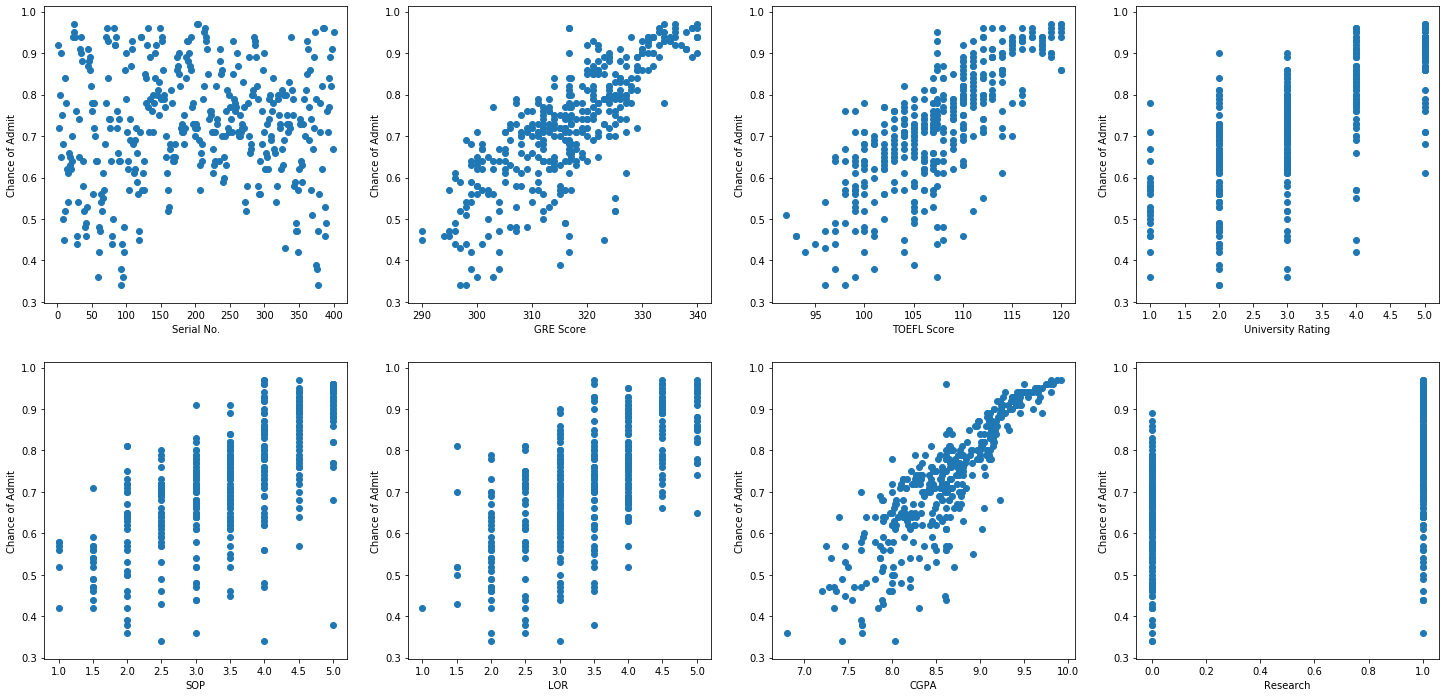

In [111]:
#Part 2.1
plt.figure(figsize=(25, 12))
for idx, col in enumerate(clean_data.columns[:-1]):
    plt.subplot(2, 4, idx+1)
    plt.scatter(clean_data[col], clean_data[clean_data.columns[-1]])
    plt.xlabel(col)
    plt.ylabel(clean_data.columns[-1])
plt.show()

#Part 3.1

We know that, if we put a vector of numbers in an inequality the output result is a vector of true/false's with the same length of that vector, where every element represents the result of inequality for that indexed number on vector.

So, We got the result of two given inequalities seperately, and then, with an "and" operation on them, we would give true just on indices that have both conditions, and at last, with putting that filter vector as index input of data frame of data we would get the entries that satify the both conditions from the cleaned_data and we name that data, selected_data.

With print length of selected_data, we see that, they are 97 entries of cleaned_dat which had 400 entries, at first.

In [112]:
#Part 3.1

higher_CPGA = clean_data['CGPA'] >= 9
higher_TOEFL = clean_data['TOEFL Score'] >= 110
selected_students = clean_data[higher_CPGA & higher_TOEFL]
print('num of selected students : ', selected_students.shape[0])

num of selected students :  97


#Part 3.2

We know that, possible values for University Rating are integer numbers from 1 to 5, so we make an iteration from 1 to 5 and, at every iteration, at first select the entries those have that, Rating University through a quality and then, we add mean value of GRE Score of selected entries to the array, storing the mean values.

then, with an iteration over enumerated mean_GRE_uni_rating, we print the university rating and its mean GRE Score on every line.

In [113]:
#Part 3.2

mean_GRE_uni_ratings = []
for rating in range(1, 6):
    filt = clean_data['University Rating'] == rating
    mean_GRE_uni_ratings.append(clean_data['GRE Score'][filt].mean())

for idx, mean in enumerate(mean_GRE_uni_ratings):
    print("GRE mean in rating ", idx+1, " = ", mean)


GRE mean in rating  1  =  303.15384615384613
GRE mean in rating  2  =  309.7528556593977
GRE mean in rating  3  =  315.9346978557505
GRE mean in rating  4  =  324.07507507507506
GRE mean in rating  5  =  327.9546296296296


#Part 4.1

In order to store the quested columns in a dataframe, we put an array of strings representing the quested columns in the column index input of dataframe, so it would get us a dataframe with having just "CGPA" and "Chance of Admit", columns of the source dataframe.

At last we print the head() of the derivated dataframe, to observe the columns of that dataframe, and their data.

In [114]:
#Part 4.1

cgpa_data = clean_data[['CGPA', 'Chance of Admit']]
print(cgpa_data.head())


   CGPA  Chance of Admit
0  9.65             0.92
1  8.87              NaN
2  8.00             0.72
3  8.67             0.80
4  8.21             0.65


#Part 4.2

In this part, at first we define the hypothesis function, which gives theta array and X array as input and gives array of predicted y's as output.

>hypothesis_func(): In this function, the x on input is a vector of input data, and we should multiply all of the elements of the vector with theta1 which is stored in theta[1] and then add theta0 stored in theta[0] to all of them. We perform these operations with .mul() and .add() functions called on the x as input vector of data.

>cost_func(): In order to calculate the cost of the hypothesis function, we implement this function in this way: square power of (Y_P - Y) gives us every element of subtracted vector squared, then with calling mean() function on this vector we get the mean value of errors, but we know that, according to the given formula, we have to divide sum of the squared diffrences by (2*m) but through mean() function this sum is divided by m, so we divide the mean() output by 2.

In order to find theta with an appropirate value, gives us a low cost: We know that, the cost function, totally is a sum of squared terms consists of theta0 and theta1, so we conclude that, cost function is a convex function with variables of theta, so its local minimum and global minimum are the at the same point, and we see that, for example when we put theta values between -1 and 1, the cost amount get lower and then decreases, so we conclude that, the local point is between -1 and 1, so we follow this algorithm to find a point near, global minimum give us a low level of cost.

>Algorithm: with iteration from i = -1 to -5, and giving the inital values of theta to be 0, at every step, we examine values between the found minimum point with step length of 10 ** i from theta - 10 ** (i+1) to theta + 10 ** (i+1), so at last, we would find a point near global optimum, because at every step we find the nearest point to optimum and choose it ot explore near it for the next step.





min theta =  [-1.082100000000001, 0.20989999999999936]
0.0738896394583354


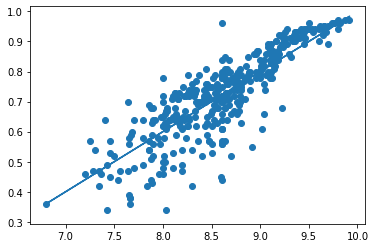

In [115]:
#Part 4.2
cgpa_X = cgpa_data['CGPA']
cgpa_Y = cgpa_data['Chance of Admit']
def hypothesis_func(theta, x):
    return x.mul(theta[1]).add(theta[0])

minError = np.inf
minTheta = [0, 0]

def cost_func(Y_p, Y):
    return ((Y_p - Y) ** 2).mean() ** 0.5

for i in range(-1, -5, -1):
    # print(i)
    for theta0 in np.arange(minTheta[0] - 10 ** (i+1), minTheta[0] + 10 ** (i+1), 10 ** i):
        for theta1 in np.arange(minTheta[1] - 10 ** (i+1), minTheta[1] + 10 ** (i+1), 10 ** i):
            Y_P = hypothesis_func([theta0, theta1], cgpa_X)
            err = cost_func(Y_P, cgpa_Y)
            if(err < minError):
                # print(theta0, theta1, "err = ", err)
                minTheta = [theta0, theta1]
                minError = err

print("min theta = ", minTheta)
Y_P = hypothesis_func(minTheta, cgpa_X)
error = cost_func(Y_P, cgpa_Y)
print(error)

plt.scatter(cgpa_X, cgpa_Y)
plt.plot(cgpa_X, Y_p)

#Part 4.3

In this part, after filtering the students with "Nan" value of Chance of Admit, calculate the forecasted values output from hypothesis function and put them, in filtered dataframe and then we get the two wanted columns to print.

In [116]:
#part 4.3

Nan_chance = clean_data[pd.isnull(clean_data["Chance of Admit"])]
Nan_chance["Chance of Admit"] = hypothesis_func(minTheta, Nan_chance["CGPA"])
final_list = Nan_chance[["Serial No.", "Chance of Admit"]]
print(final_list)

     Serial No.  Chance of Admit
1             2         0.779713
57           58         0.513140
135         136         0.758723
143         144         1.000108
171         172         0.821693
218         219         0.800703
232         233         0.653773
251         252         0.807000
272         273         0.521536
294         295         0.664268
315         316         0.611793
338         339         0.752426
357         358         0.574011
381         382         0.737733
390         391         0.647476
396         397         0.830089


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
